In [1]:
MAIN_PATH = "/home/carlos/MasterDS/tfm"
JSON_DATA_PATH = '{}/data/json/'.format(MAIN_PATH)
CSV_DATA_PATH = '{}/data/csv/'.format(MAIN_PATH)

In [2]:
import sys
sys.path.insert(0, MAIN_PATH)

In [3]:
%load_ext autoreload
%autoreload 2
from scripts.models.ltr_nn_tf.train import LTRNNTFTrain
from scripts.models.ltr_nn_tf.metrics import LTRNNTFMetrics

%reload_ext autoreload

# Entrenamiento

In [4]:
ltr_params = {
    'mode': 'tfidf',
    'count_vec_kwargs': {'strip_accents': 'unicode'},
    'target_metric': 'cosine_tfidf',
    'metric_params': {'ngram_range': (1, 2), 'strip_accents': 'unicode'},
    'drop_teams': True,
    'lemma': True,
    'train_perc': 0.7,
    'val_perc': 0.2
}
DENSE_LAYERS = [125, 60, 20]
N_DROPOUT = 3

model_params = {
    'dense_layers': DENSE_LAYERS,
    'dense_activation': ['relu'] * len(DENSE_LAYERS),
    'dropout': [0.3] * N_DROPOUT,
    'optimizer': 'adam',
}

dim_reduction_params = {
        'dim_reduction': 'truncated_svd',
        'dim_reduction_params': {
            'n_components': 250,
            'random_state': 10
    }
}

opt_metric = 'mean_squared_error'
epochs = 25
batch_size = 128

In [5]:
ltr_train = LTRNNTFTrain(ltr_params, epochs=epochs, batch_size=batch_size,
                         model_params=model_params,
                         opt_metric=opt_metric, 
                        dim_reduction_params=dim_reduction_params)

Using truncated_svd for dimensionality reduction
Using truncated_svd for dimensionality reduction
Setting target metric to cosine_tfidf
Setting mode to tfidf
Optimizing mean_squared_error with adam
Epochs: 25
Batch size: 128


In [6]:
ltr_train.experiment_id()

'd4310cd9a8'

In [7]:
ltr_train.train()

Writing config in /home/carlos/MasterDS/tfm/models/ltr_nn_tfidf/d4310cd9a8/config.pickle
Loading training data from /home/carlos/MasterDS/tfm/data/ltr/features_targets/11aeeba295
Loading validation data from /home/carlos/MasterDS/tfm/data/ltr/features_targets/11aeeba295
Training truncated_svd with the following parameters:{'n_components': 250, 'random_state': 10}
Train shape before: (339040, 6550)
Validation shape before: (42380, 6550)
Train shape after: (339040, 250)
Validation shape after: (42380, 250)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 125)               31375     
_________________________________________________________________
dropout (Dropout)            (None, 125)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 60)                7560      
________

## Métricas

Usando nuestros procesos:

In [8]:
ltr_metrics = LTRNNTFMetrics(ltr_train)

In [9]:
ltr_metrics.run()

Computing metric for train dataset
Reducing x dimension
Shape before: (339040, 6550)
Shape after: (339040, 250)
Writing metrics to /home/carlos/MasterDS/tfm/models/ltr_nn_tfidf/d4310cd9a8/train_metrics.pickle
Computing metric for validation dataset
Reducing x dimension
Shape before: (42380, 6550)
Shape after: (42380, 250)
Writing metrics to /home/carlos/MasterDS/tfm/models/ltr_nn_tfidf/d4310cd9a8/validation_metrics.pickle
Computing metric for test dataset
Reducing x dimension
Shape before: (42380, 6550)
Shape after: (42380, 250)
Writing metrics to /home/carlos/MasterDS/tfm/models/ltr_nn_tfidf/d4310cd9a8/test_metrics.pickle


Reading metrics from /home/carlos/MasterDS/tfm/models/ltr_nn_tfidf/d4310cd9a8/train_metrics.pickle
mse : 0.01859140053616839
mae : 0.1090180427380804
r2 : 0.23927490144836472


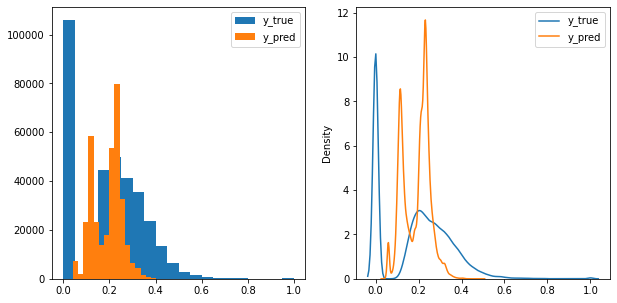

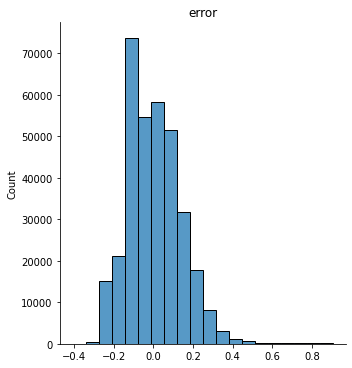

In [10]:
ltr_metrics.show_metrics('train')

Reading metrics from /home/carlos/MasterDS/tfm/models/ltr_nn_tfidf/d4310cd9a8/validation_metrics.pickle
mse : 0.01912465628779217
mae : 0.11106607512301611
r2 : 0.22241508467508841


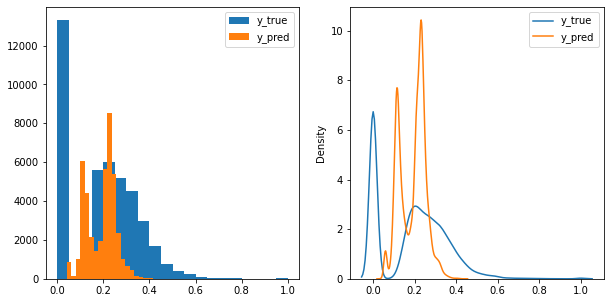

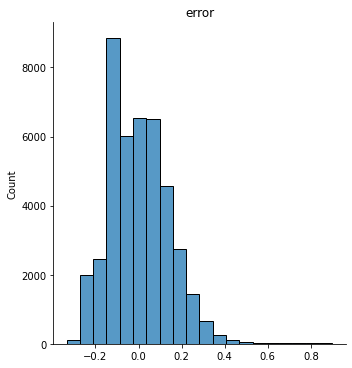

In [11]:
ltr_metrics.show_metrics('validation')